### 449. Serialize and Deserialize BST

#### Content
<p>Serialization is converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.</p>

<p>Design an algorithm to serialize and deserialize a <b>binary search tree</b>. There is no restriction on how your serialization/deserialization algorithm should work. You need to ensure that a binary search tree can be serialized to a string, and this string can be deserialized to the original tree structure.</p>

<p><b>The encoded string should be as compact as possible.</b></p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<pre><strong>Input:</strong> root = [2,1,3]
<strong>Output:</strong> [2,1,3]
</pre><p><strong>Example 2:</strong></p>
<pre><strong>Input:</strong> root = []
<strong>Output:</strong> []
</pre>
<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[0, 10<sup>4</sup>]</code>.</li>
	<li><code>0 &lt;= Node.val &lt;= 10<sup>4</sup></code></li>
	<li>The input tree is <strong>guaranteed</strong> to be a binary search tree.</li>
</ul>


#### Difficulty: Medium, AC rate: 55.9%

#### Question Tags:
- String
- Tree
- Depth-First Search
- Breadth-First Search
- Design
- Binary Search Tree
- Binary Tree

#### Links:
 🎁 [Question Detail](https://leetcode.com/problems/serialize-and-deserialize-bst/description/) | 🎉 [Question Solution](https://leetcode.com/problems/serialize-and-deserialize-bst/solution/) | 💬 [Question Discussion](https://leetcode.com/problems/serialize-and-deserialize-bst/discuss/?orderBy=most_votes)

#### Hints:


#### Sample Test Case
[2,1,3]

---
What's your idea?

同 #297 题, BFS

---

In [3]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [4]:
class Codec:

    def serialize(self, root: Optional[TreeNode]) -> str:
        """Encodes a tree to a single string.
        """
        if root is None:
            return ''
        r = ''
        cur = [root]
        while cur:
            nxt = []
            for n in cur:
                if n:
                    nxt += [n.left, n.right]
            if not nxt:
                break
            r += (','.join([str(n.val) if n else 'N' for n in cur]) + '#')
            cur = nxt
        return r
        

    def deserialize(self, data: str) -> Optional[TreeNode]:
        """Decodes your encoded data to tree.
        """
        if not data:
            return None
        levels = data.split('#')
        root = TreeNode(int(levels[0]))
        prev = [root]
        for level in levels[1:-1]:
            vals = level.split(',')
            cur = []
            for idx, n in enumerate(prev):
                n.left = TreeNode(int(vals[2*idx])) if vals[2*idx] != 'N' else None
                if n.left:
                    cur.append(n.left)
                n.right = TreeNode(int(vals[2*idx+1])) if vals[2*idx+1] != 'N' else None
                if n.right:
                    cur.append(n.right)
            prev = cur
        return root

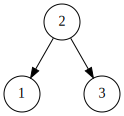

In [5]:
from helper import array_to_tree
from visualizer import visualize_binary_tree
# Your Codec object will be instantiated and called as such:
ser = Codec()
deser = Codec()

root = array_to_tree([2,1,3])
tree = ser.serialize(root)
visualize_binary_tree(deser.deserialize(tree))

In [6]:
import sys, os; sys.path.append(os.path.abspath('..'))
from submitter import submit
submit(449)

😃 Result: Accepted

📥 Input: ``

📤 Output: ``

✅ Expected: ``

💯 Passed Test Case: 62 / 62

🚀 Runtime: 90 ms, Memory: 18.6 MB

🉑 Runtime Percentile: better than 70.84%, Memory Percentile: better than 51.87%

📆 Finished At: 2022-02-24